---
# 6.Matrix Plot & Settings Exercise
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme(context="talk", style="darkgrid", font="MS GOTHIC")

Exercise_1 : Seabornのデータセット"iris"を読み込んでください

In [3]:
df = sns.load_dataset('iris')

<details>
    <summary><font color='red'>解答はここをクリック</font></summary>
    <code>df = sns.load_dataset('iris')</code>
</details>

In [4]:
# 実行して表示
df.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,species
113,5.7,2.5,5.0,2.0,virginica
61,5.9,3.0,4.2,1.5,versicolor
26,5.0,3.4,1.6,0.4,setosa


Exercise_2 : np.where()を用いて以下の実行内容と同様の結果を取得してください

In [5]:
# 実行して表示
df[df['petal_length'] > 6].index

Index([105, 107, 109, 117, 118, 122, 130, 131, 135], dtype='int64')

In [6]:
np.where(df['petal_length'] > 6)

(array([105, 107, 109, 117, 118, 122, 130, 131, 135], dtype=int64),)

<details>
    <summary><font color='red'>解答はここをクリック</font></summary>
    <code>np.where(df['petal_length'] > 6)</code>
</details>

Exercise_3 : 'petal_length'の分布をヒストグラムで表示してください。（bins=30）

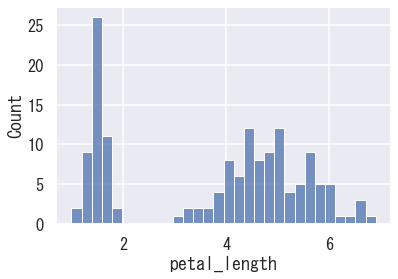

In [7]:
# sns.histplot(data=df, x='petal_length', bins=30)
sns.histplot(df['petal_length'], bins=30)
plt.show()

<details>
    <summary><font color='red'>解答はここをクリック</font></summary>
    <code>sns.histplot(df['petal_length'], bins=30)</code>
</details>

Exercise_4 : 'petal_width'で2グループに分けられると考えて、1.3より小さいレコードには'narrow'、それ以上のもには'wide'というラベルを与えます。そのラベルを持つ'pw'というカラムをdfに追加してください

In [8]:
df['pw'] = np.where(df['petal_width'] < 1.3, 'narrow', 'wide')

<details>
    <summary><font color='red'>解答はここをクリック</font></summary>
    <code>df['pw'] = np.where(df['petal_width'] < 1.3, 'narrow', 'wide')</code>
</details>

In [9]:
# 実行して表示
df['pw'].value_counts()

pw
wide      85
narrow    65
Name: count, dtype: int64

Exercise_5: また、'petal_length'において、第一四分数より小さいものには'short'、第三四分位数より大きいものには'long'、その他には範'normal'というラベルを持つ'pl'というカラムも同様に追加してください。　ヒント　np.select(), 繰り返し使うSeriesは変数に格納して使うことができます

In [10]:
# 実行して表示
# 四分位数を確認してください
df['petal_length'].describe()

count    150.000000
mean       3.758000
std        1.765298
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: petal_length, dtype: float64

In [11]:
# conditionsの中で、xという変数を使ってください
x = df['petal_length']
conditions = [x < 1.6, (x >= 1.6)&(x < 5.1), 5.1 <= x]
values = ['short', 'normal', 'long']

<details>
    <summary><font color='red'>解答はここをクリック</font></summary>
    <code>conditions = [x < 1.6, (1.6 <= x) & (x <= 5.1), 5.1 < x]</code>
</details>

In [12]:
df['pl'] = np.select(condlist=conditions, choicelist=values)

<details>
    <summary><font color='red'>解答はここをクリック</font></summary>
    <code>df['pl'] = np.select(conditions, values)</code>
</details>

In [13]:
# 実行して表示
df.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,species,pw,pl
106,4.9,2.5,4.5,1.7,virginica,wide,normal
41,4.5,2.3,1.3,0.3,setosa,narrow,short
75,6.6,3.0,4.4,1.4,versicolor,wide,normal


Exercise_7: 各特徴量（説明変数）の相関関係を Heatmap で表示してください  
※ パラメータには data=df.corr() のみを指定してください

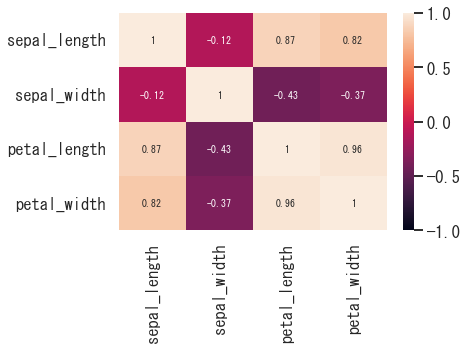

In [14]:
df_corr = df.select_dtypes(float).corr()
sns.heatmap(data=df_corr, annot=True, vmin=-1)
plt.show()

<details>
    <summary><font color='red'>解答はここをクリック</font></summary>
    <code>sns.heatmap(df.corr())</code>
</details>

Exercise_8 : 上記の Heatmap に対して、相関係数の表示（小数3桁まで）、カラーマップの指定を Spectral、正方形での表示、カラーバーの最小値を -1 に設定してください

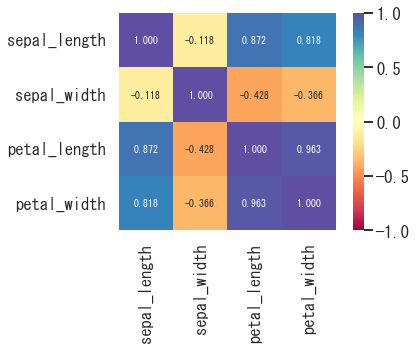

In [15]:
sns.heatmap(data=df_corr, annot=True, fmt='.3f', vmin=-1, square=True, cmap='Spectral')

plt.show()

<details>
    <summary><font color='red'>解答はここをクリック</font></summary>
    <code>sns.clustermap(df.corr(), annot=True, fmt='.3f', cmap='Spectral', vmin=-1, linewidth=1, figsize=(6, 6), annot_kws={'size':12})</code>
</details>

Exercise_9 : 上記のそのままの内容を Clustermap で表してください。一度表示させた後、 annotationの文字サイズを若干小さく調整し、枠線を引くことで各セルを分離してください。　※ square=Trueは不要, figsize=(6, 6)

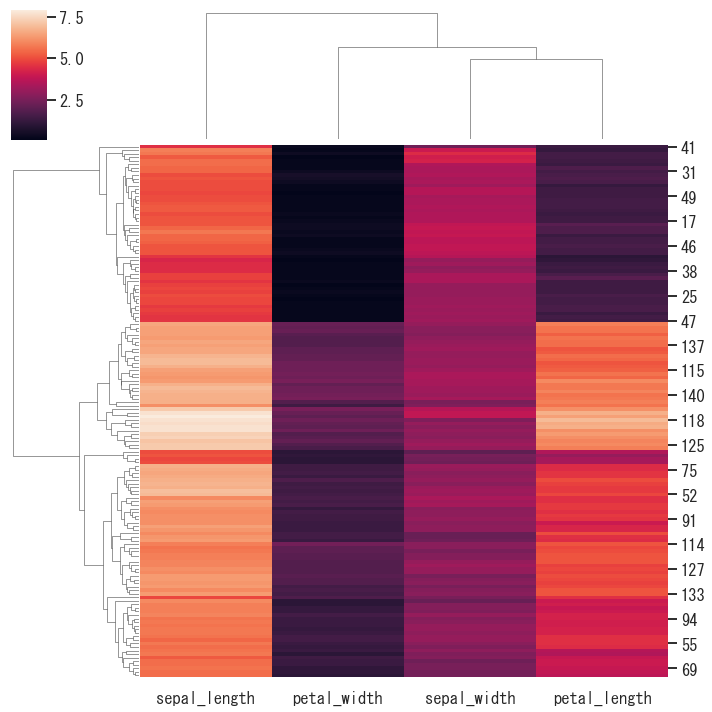

In [16]:
sns.clustermap(data=df.select_dtypes(float))

plt.show()

<details>
    <summary><font color='red'>解答はここをクリック</font></summary>
    <code>sns.clustermap(df.corr(), annot=True, fmt='.3f', cmap='Spectral', square=True, vmin=-1, linewidth=1, annot_kws={'size':12})</code>
</details>

In [17]:
# 実行して表示
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,pw,pl
0,5.1,3.5,1.4,0.2,setosa,narrow,short
1,4.9,3.0,1.4,0.2,setosa,narrow,short
2,4.7,3.2,1.3,0.2,setosa,narrow,short
3,4.6,3.1,1.5,0.2,setosa,narrow,short
4,5.0,3.6,1.4,0.2,setosa,narrow,short


Exercise_10 : データタイプが'float'の四つの特徴量の相関を４×４のペアプロットで表示してください。対角線上はヒストグラム、対角線より上にはKDEプロット、対角線より下にはREGプロットとして表示してください(height=2.5)

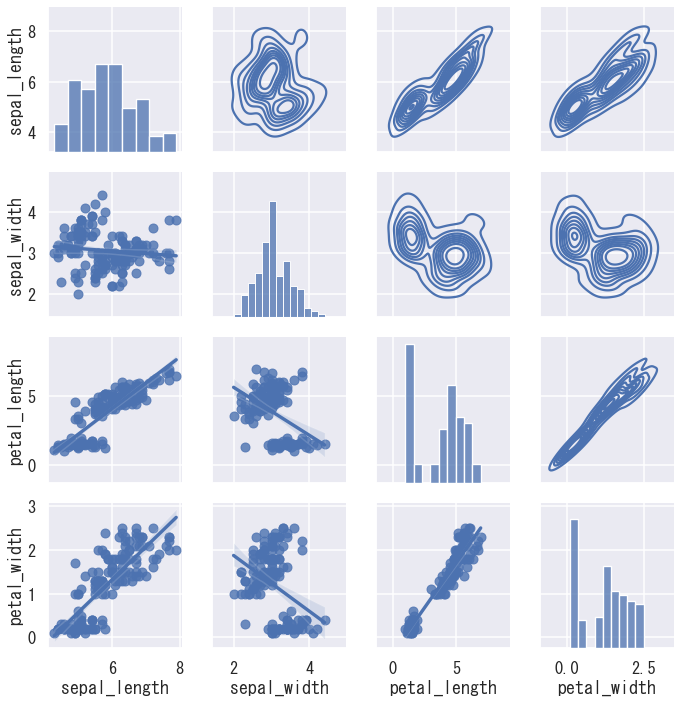

In [18]:
g = sns.PairGrid(data=df, vars=df.select_dtypes(float).columns, height=2.5)
g.map_diag(sns.histplot)
g.map_upper(sns.kdeplot)
g.map_lower(sns.regplot)

plt.show()

<details>
    <summary><font color='red'>解答はここをクリック</font></summary>
    <code>g = sns.PairGrid(df, vars=df.select_dtypes(float).columns, height=2.5)</code><br>
    <code>g.map_diag(sns.histplot)</code><br>
    <code>g.map_upper(sns.kdeplot)</code><br>
    <code>g.map_lower(sns.regplot)</code><br>
</details>

Exercise_11 : 上記のペアプロットにおいて、'species'で色分けを行い、その色分けの内訳を示すレジェンドも表示して下さい。また、ヒストグラムには multiple='fill'を指定してください

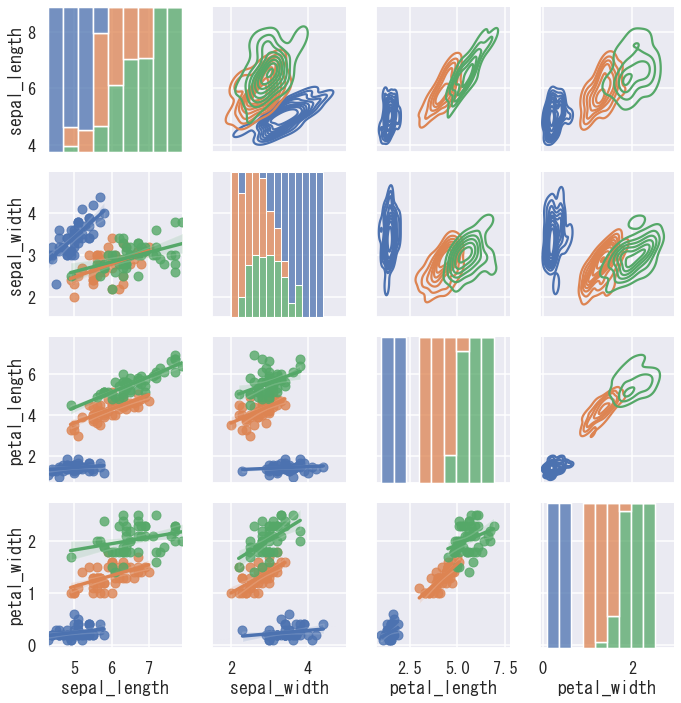

In [19]:
g = sns.PairGrid(df, vars=df.select_dtypes(float).columns, 
                 height=2.5, hue='species')
g.map_diag(sns.histplot, multiple='fill')
g.map_upper(sns.kdeplot)
g.map_lower(sns.regplot)

plt.show()

<details>
    <summary><font color='red'>解答はここをクリック</font></summary>
    <code>g = sns.PairGrid(df, vars=df.select_dtypes(float).columns, height=2.5, hue='species')</code><br>
    <code>g.map_diag(sns.histplot, multiple='fill')</code><br>
    <code>g.map_upper(sns.kdeplot)</code><br>
    <code>g.map_lower(sns.regplot)</code><br>
    <code>g.add_legend()</code>  
</details>

Exercise_12 : FacetGridを作成します。ひとまず、行方向が'pw'、列方向が'pl'のクラスでの分類となるグリッドを作成してください。axesの中は空白でかまいません（height=5）

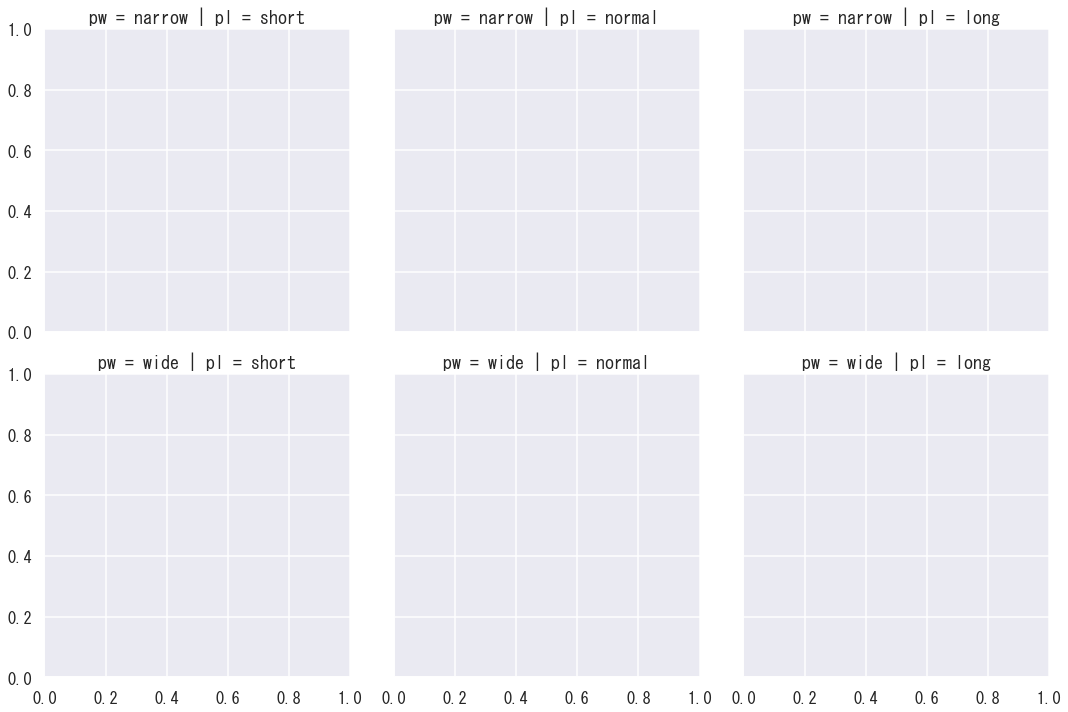

In [20]:
g = sns.FacetGrid(data=df, row='pw', col='pl', height=5)


plt.show()

<details>
    <summary><font color='red'>解答はここをクリック</font></summary>
    <code>g = sns.FacetGrid(df, row='pw', col='pl', height=5)</code><br>
</details>

Exercise_13 : 続いて、色分けを'species'、プロットの種類をREGプロットとし、'sepal_length'と'sepal_width'の関係を表示してください

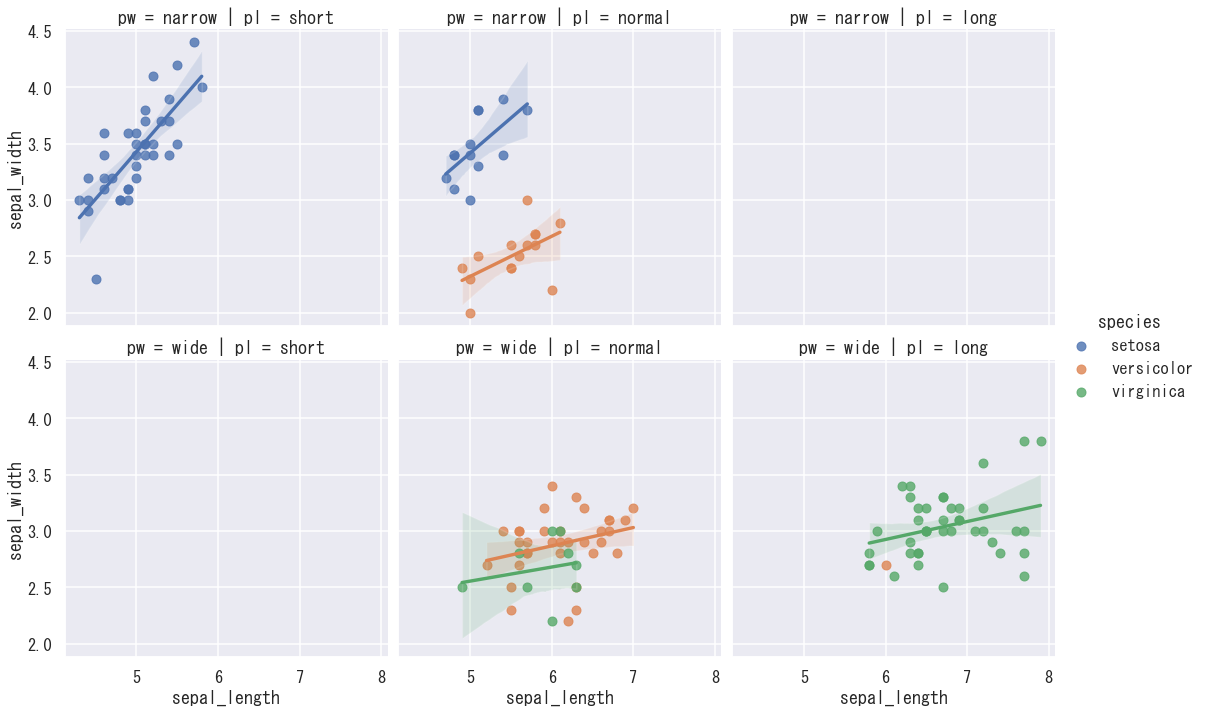

In [21]:
g = sns.FacetGrid(data=df, row='pw', col='pl', height=5, hue='species')
g.map(sns.regplot, 'sepal_length', 'sepal_width')
g.add_legend()

plt.show()

<details>
    <summary><font color='red'>解答はここをクリック</font></summary>
    <code>g = sns.FacetGrid(df, row='pw', col='pl', height=5, hue='species')</code><br>
    <code>g.map(sns.scatterplot, 'sepal_length', 'sepal_width')</code><br>
    <code>g.add_legend()</code>  
</details>

Exercise_14 : 'pl'のカウント数を元に'short'、'normal'、'long'の占める割合を円グラフで表してください。パーセントの表示桁数は小数第一位まで、また、12時の地点から時計回りに並ぶように調整してください。

In [25]:
# 実行して表示
df['pl'].value_counts()

pl
normal    71
long      42
short     37
Name: count, dtype: int64

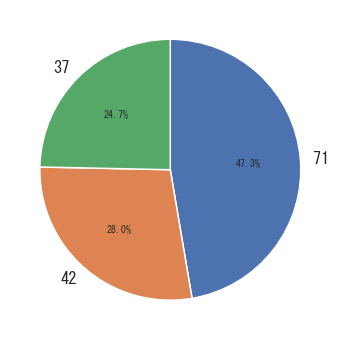

In [30]:
plt.figure(figsize=(8,6))
plt.pie(df['pl'].value_counts(), labels=df['pl'].value_counts(), autopct='%.1f%%', counterclock=False, startangle=90)
plt.show()

<details>
    <summary><font color='red'>解答はここをクリック</font></summary>
    <code>plt.pie(df['pl'].value_counts(), labels=df['pl'].value_counts().index, autopct='%.1f%%', counterclock=False, startangle=90)</code><br>
</details>

Exercise_15 : 以下の画像のようなグラフを作成します。ひとつずつ順に入力し完成させてください  
※ #1などの下に適切なコードを記述してください

<p><img src="./images/sepal_width.png" alt="sepal_width" style='margin:0'/></p> 

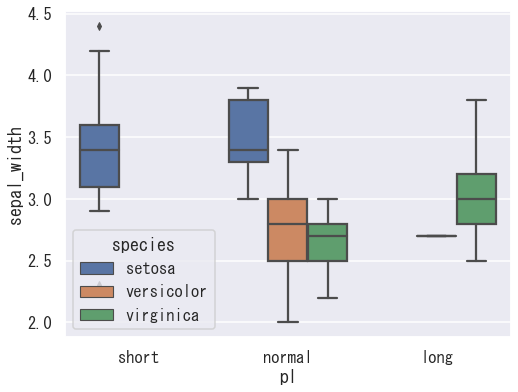

In [32]:
# 実行して表示。このグラフを上記と同じになるよう変更します
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='pl', y='sepal_width', hue='species')
plt.show()

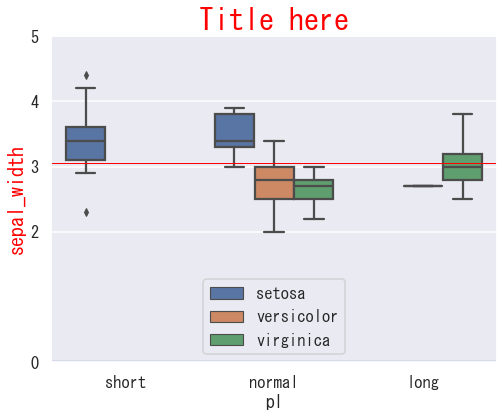

In [44]:
# 実行して表示
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='pl', y='sepal_width', hue='species')

# 1.タイトル
plt.title('Title here', fontsize=30, color='red')

# 2.Yラベル
plt.ylabel('sepal_width', fontsize=20, color='red')

# 3.Y軸の目盛り
plt.yticks([0, 2, 3, 4, 5])

# 4.レジェンド
plt.legend(loc='lower center')

# 5.平均値の水平線
plt.axhline()

plt.axhline(df['sepal_width'].mean(), linewidth=1, color='red')

<details>
    <summary><font color='red'>解答はここをクリック　1</font></summary>
    <code>plt.title('Title here', fontsize=30, pad=20, color='red')</code><br>
</details>

<details>
    <summary><font color='red'>解答はここをクリック　2</font></summary>
    <code>plt.ylabel('sepal_width', color='red', fontsize='large', labelpad=20)</code><br>
</details>

<details>
    <summary><font color='red'>解答はここをクリック　3</font></summary>
    <code>plt.yticks(ticks=[0, 2, 3, 4, 5])</code><br>
</details>

<details>
    <summary><font color='red'>解答はここをクリック　4</font></summary>
    <code>plt.legend(loc='lower center')</code><br>
</details>

<details>
    <summary><font color='red'>解答はここをクリック　5</font></summary>
    <code>plt.axhline(df['sepal_width'].mean(), color='red', linewidth=1)</code><br>
</details>

Exercise_16 : 以下の画像のようなグラフを作成します。ひとつずつ順に入力し完成させてください  
※ #1などの下に適切なコードを記述してください

<p><img src="./images/4_plots.png" alt="4plots" style="margin:0"/></p> 

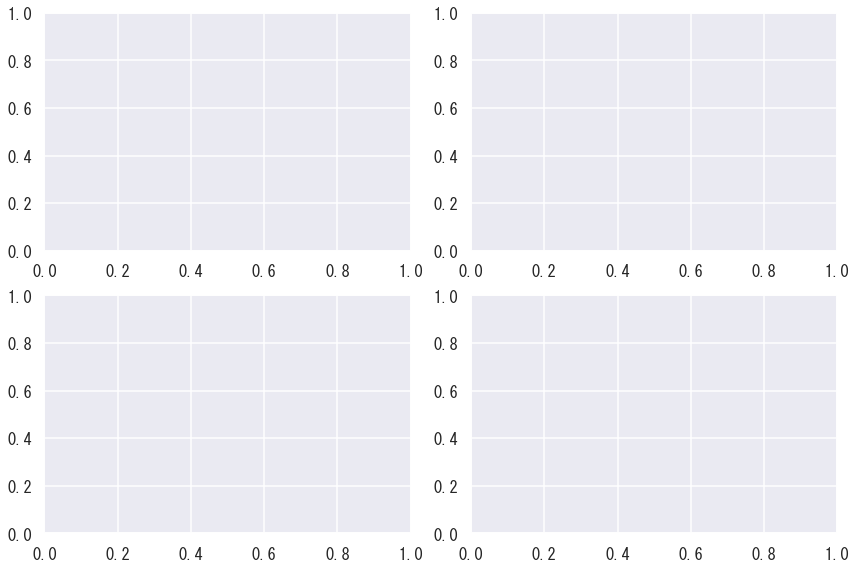

In [45]:
# 実行して表示
fig, axes = plt.subplots(2, 2, figsize=(12,8), tight_layout=True)

C:\Users\arata\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:3544: UserWarning: 18.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


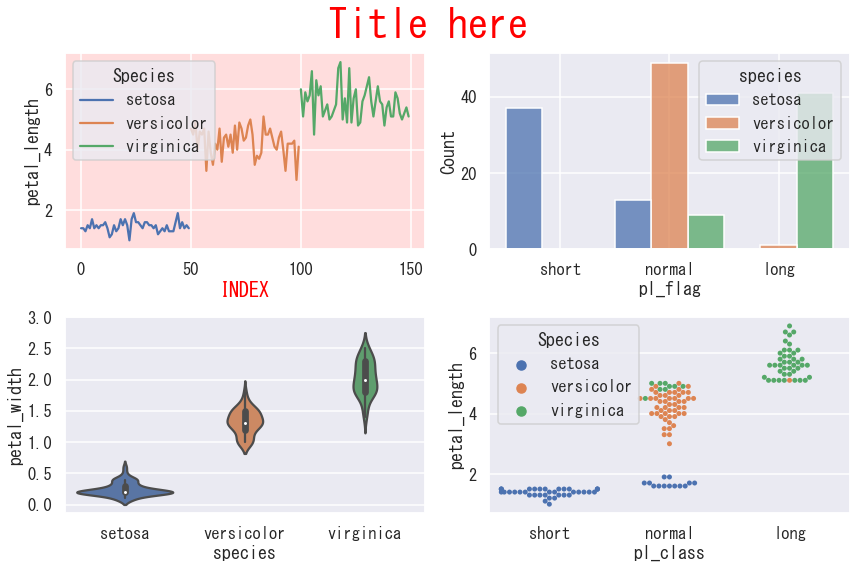

In [92]:
fig, axes = plt.subplots(2, 2, figsize=(12,8), tight_layout=True)

# 1.(0, 0)にラインプロット
sns.lineplot(data=df, x=df.index, y='petal_length', hue='species', ax=axes[0, 0])

# 2.(0, 1)にヒストプロット
sns.histplot(data=df, x='pl', hue='species', multiple='dodge', ax=axes[0, 1])

# 3.(1, 0)にバイオリンプロット
sns.violinplot(data=df, x='species', y='petal_width', ax=axes[1,0])

# 4.(1, 1)にスウォームプロット
sns.swarmplot(data=df, x='pl', y='petal_length', hue='species')

# 5.全体のタイトル
fig.suptitle('Title here', fontsize=40, color='red')

# 6.プロットの間隔を少し空ける
fig.subplots_adjust(wspace=2, hspace=1)

# 7.背景色の変更 "#fdd"
axes[0,0].set_facecolor('#fdd')

# 8.X軸ラベルの設定 "INDEX"
axes[0,0].set_xlabel('INDEX', fontsize=20, color='red')
axes[0,0].set_xticks([0, 50, 100, 150])
axes[0,1].set_xlabel('pl_flag')
axes[1,1].set_xlabel('pl_class')


# 9.Y軸目盛の変更
axes[0,1].set_yticks([0, 20, 40])
axes[1,0].set_yticks(np.arange(0, 3.5, 0.5))


# 10.テキストの挿入（X軸の目盛りはそれぞれの中心軸が0,1,2）
axes[0, 0].legend(loc='upper left', title='Species')
axes[1, 1].legend(loc='upper left', title='Species')

plt.show()

<details>
    <summary><font color='red'>解答はここをクリック　1</font></summary>
    <code>sns.lineplot(data=df, x=df.index, y='petal_length', hue='species', ax=axes[0, 0])</code><br>
</details>

<details>
    <summary><font color='red'>解答はここをクリック　2</font></summary>
    <code>sns.histplot(data=df, x='pl', ax=axes[0, 1], hue='species', multiple='dodge')</code><br>
</details>

<details>
    <summary><font color='red'>解答はここをクリック　3</font></summary>
    <code>sns.violinplot(data=df, x='species', y='petal_width', ax=axes[1, 0])</code><br>
</details>

<details>
    <summary><font color='red'>解答はここをクリック　4</font></summary>
    <code>sns.swarmplot(data=df, x='pw', y='petal_length', hue='species', ax=axes[1, 1])</code><br>
</details>

<details>
    <summary><font color='red'>解答はここをクリック　5</font></summary>
    <code>fig.suptitle("Title here", size=40, color='red')</code><br>
</details>

<details>
    <summary><font color='red'>解答はここをクリック　6</font></summary>
    <code>fig.subplots_adjust(wspace=2, hspace=1)</code><br>
</details>

<details>
    <summary><font color='red'>解答はここをクリック　7</font></summary>
    <code>axes[0, 0].set_facecolor("#fdd")</code><br>
</details>

<details>
    <summary><font color='red'>解答はここをクリック　8</font></summary>
    <code>axes[0, 0].set_xlabel('INDEX', color='red')</code><br>
</details>

<details>
    <summary><font color='red'>解答はここをクリック　9</font></summary>
    <code>axes[1, 0].set_yticks(np.linspace(0, 3, 7))
</code><br>
</details>

<details>
    <summary><font color='red'>解答はここをクリック　10</font></summary>
    <code>axes[1, 0].text(1, 0.1, 'Good job!', size=30, c='red')</code><br>
</details>

## 以上